# Exploratory analysis of the dengAI dataset

In [12]:
!pip install pandas==1.0.1
!pip install tabulate

sparkmagic 0.12.5 has requirement notebook<6.0,>=4.2, but you'll have notebook 6.0.3 which is incompatible.
jupyterlab-server 1.0.0 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
sparkmagic 0.12.5 has requirement notebook<6.0,>=4.2, but you'll have notebook 6.0.3 which is incompatible.
jupyterlab-server 1.0.0 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [41]:
% matplotlib  inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

cities = ['sj', 'iq']

In [5]:
def load_data():
    data_dir = './data/input'
    train_features_csv = f'{data_dir}/dengue_features_train.csv'
    train_labels_csv = f'{data_dir}/dengue_labels_train.csv'
    test_features_csv = f'{data_dir}/dengue_features_test.csv'
    
    train_features_df = pd.read_csv(train_features_csv)
    train_labels_df = pd.read_csv(train_labels_csv)
    test_features_df = pd.read_csv(test_features_csv)
   
    train_df = train_features_df.merge(train_labels_df, left_on=['city', 'year', 'weekofyear'], right_on=['city', 'year', 'weekofyear'])
    
    print(f'length train feature: {len(train_features_df)}')
    print(f'length train labels: {len(train_labels_df)}')
    print(f'length test feature: {len(test_features_df)}')
    print(f'length train merge: {len(train_df)}')
    
    return train_df, test_features_df

## Shape of data

In [6]:
train_df, test_df = load_data()

length train feature: 1456
length train labels: 1456
length test feature: 416
length train merge: 1456


In [8]:
print(f'train set: {train_df.shape}')
print(f'test set: {test_df.shape}')

train set: (1456, 25)
test set: (416, 24)


In [9]:
train_df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8               41.4            4  
3                23.3                4.0            3  
4                23.9                5.8            6  

[5 rows x 25 columns]

In [10]:
train_df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [17]:
data_desc = train_df.describe().T
data_desc['std_from_mean'] = (data_desc['max']-data_desc['mean'])/data_desc['std']
#print(data_desc.to_markdown())
data_desc

count         mean        std  \
year                                   1456.0  2001.031593   5.408314   
weekofyear                             1456.0    26.503434  15.019437   
ndvi_ne                                1262.0     0.142294   0.140531   
ndvi_nw                                1404.0     0.130553   0.119999   
ndvi_se                                1434.0     0.203783   0.073860   
ndvi_sw                                1434.0     0.202305   0.083903   
precipitation_amt_mm                   1443.0    45.760388  43.715537   
reanalysis_air_temp_k                  1446.0   298.701852   1.362420   
reanalysis_avg_temp_k                  1446.0   299.225578   1.261715   
reanalysis_dew_point_temp_k            1446.0   295.246356   1.527810   
reanalysis_max_air_temp_k              1446.0   303.427109   3.234601   
reanalysis_min_air_temp_k              1446.0   295.719156   2.565364   
reanalysis_precip_amt_kg_per_m2        1446.0    40.151819  43.434399   
reanalysis_relative_humidity_percent   1446.0    82.161959   7.153897   
reanalysis_sat_precip_amt_mm           1443.0    45.760388  43.715537   
reanalysis_specific_humidity_g_per_kg  1446.0    16.746427   1.542494   
reanalysis_tdtr_k                      1446.0     4.903754   3.546445   
station_avg_temp_c                     1413.0    27.185783   1.292347   
station_diur_temp_rng_c                1413.0     8.059328   2.128568   
station_max_temp_c                     1436.0    32.452437   1.959318   
station_min_temp_c                     1442.0    22.102150   1.574066   
station_precip_mm                      1434.0    39.326360  47.455314   
total_cases                            1456.0    24.675137  43.596000   

                                               min          25%          50%  \
year                                   1990.000000  1997.000000  2002.000000   
weekofyear                                1.000000    13.750000    26.500000   
ndvi_ne                                  -0.406250     0.044950     0.128817   
ndvi_nw                                  -0.456100     0.049217     0.121429   
ndvi_se                                  -0.015533     0.155087     0.196050   
ndvi_sw                                  -0.063457     0.144209     0.189450   
precipitation_amt_mm                      0.000000     9.800000    38.340000   
reanalysis_air_temp_k                   294.635714   297.658929   298.646429   
reanalysis_avg_temp_k                   294.892857   298.257143   299.289286   
reanalysis_dew_point_temp_k             289.642857   294.118929   295.640714   
reanalysis_max_air_temp_k               297.800000   301.000000   302.400000   
reanalysis_min_air_temp_k               286.900000   293.900000   296.200000   
reanalysis_precip_amt_kg_per_m2           0.000000    13.055000    27.245000   
reanalysis_relative_humidity_percent     57.787143    77.177143    80.301429   
reanalysis_sat_precip_amt_mm              0.000000     9.800000    38.340000   
reanalysis_specific_humidity_g_per_kg    11.715714    15.557143    17.087143   
reanalysis_tdtr_k                         1.357143     2.328571     2.857143   
station_avg_temp_c                       21.400000    26.300000    27.414286   
station_diur_temp_rng_c                   4.528571     6.514286     7.300000   
station_max_temp_c                       26.700000    31.100000    32.800000   
station_min_temp_c                       14.700000    21.100000    22.200000   
station_precip_mm                         0.000000     8.700000    23.850000   
total_cases                               0.000000     5.000000    12.000000   

                                               75%          max  std_from_mean  
year                                   2005.000000  2010.000000       1.658263  
weekofyear                               39.250000    53.000000       1.764152  
ndvi_ne                                   0.248483     0.508357       2.604857  
ndvi_nw                                   

**Define some groups for these columns to ease possible future manipulations**

In [22]:
station_cols = [col for col in train_df if col.startswith('station')]
forecast_cols = [col for col in train_df if col.startswith('reanalysis')]
ndvi_cols = [col for col in train_df if col.startswith('ndvi')]
precipitation_cols = [col for col in train_df if col.startswith('precipitation')]
cols_dict = {'station_cols': station_cols, 'forecast_cols': forecast_cols, 'ndvi_cols': ndvi_cols, 'precipitation_cols':precipitation_cols}

### Focus on year city component

In [23]:
print(train_df.groupby(by=['city','year']).size())
print(test_df.groupby(['city', 'year']).size())

city  year
iq    2000    26
      2001    52
      2002    52
      2003    52
      2004    52
      2005    52
      2006    52
      2007    52
      2008    52
      2009    52
      2010    26
sj    1990    35
      1991    52
      1992    52
      1993    52
      1994    52
      1995    52
      1996    52
      1997    52
      1998    52
      1999    52
      2000    52
      2001    52
      2002    52
      2003    52
      2004    52
      2005    52
      2006    52
      2007    52
      2008    17
dtype: int64
city  year
iq    2010    26
      2011    52
      2012    52
      2013    26
sj    2008    35
      2009    52
      2010    52
      2011    52
      2012    52
      2013    17
dtype: int64


In [24]:
print(train_df.groupby(by=['city']).size())
print(test_df.groupby(by=['city']).size())

city
iq    520
sj    936
dtype: int64
city
iq    156
sj    260
dtype: int64


**We see that initial year for training is truncated, as well as ending year for testing.**

**The training and testing sets doesn't seem to overlap.**

### year, weeofyear and week_start_date

Check if we have a mismatch between pandas datetime conversion output with the information in the dataframe.

In [25]:
train_df.week_start_date = pd.to_datetime(train_df.week_start_date)

In [26]:
sum((train_df.week_start_date.dt.weekofyear!=train_df.weekofyear) | (train_df.week_start_date.dt.year!=train_df.year))

0

## Missing values

In [27]:
pd.concat([pd.Series(train_df.isna().sum(), name='train_NAN'),
           pd.Series(train_df.count(), name='train_OK'),
           pd.Series(test_df.isna().sum(), name='test_NAN'),
           pd.Series(test_df.count(), name='test_OK')
          ], axis=1, sort=True)

train_NAN  train_OK  test_NAN  test_OK
city                                           0      1456       0.0    416.0
ndvi_ne                                      194      1262      43.0    373.0
ndvi_nw                                       52      1404      11.0    405.0
ndvi_se                                       22      1434       1.0    415.0
ndvi_sw                                       22      1434       1.0    415.0
precipitation_amt_mm                          13      1443       2.0    414.0
reanalysis_air_temp_k                         10      1446       2.0    414.0
reanalysis_avg_temp_k                         10      1446       2.0    414.0
reanalysis_dew_point_temp_k                   10      1446       2.0    414.0
reanalysis_max_air_temp_k                     10      1446       2.0    414.0
reanalysis_min_air_temp_k                     10      1446       2.0    414.0
reanalysis_precip_amt_kg_per_m2               10      1446       2.0    414.0
reanalysis_relative_humidity_percent          10      1446       2.0    414.0
reanalysis_sat_precip_amt_mm                  13      1443       2.0    414.0
reanalysis_specific_humidity_g_per_kg         10      1446       2.0    414.0
reanalysis_tdtr_k                             10      1446       2.0    414.0
station_avg_temp_c                            43      1413      12.0    404.0
station_diur_temp_rng_c                       43      1413      12.0    404.0
station_max_temp_c                            20      1436       3.0    413.0
station_min_temp_c                            14      1442       9.0    407.0
station_precip_mm                             22      1434       5.0    411.0
total_cases                                    0      1456       NaN      NaN
week_start_date                                0      1456       0.0    416.0
weekofyear                                     0      1456       0.0    416.0
year                                           0      1456       0.0    416.0

In [28]:
train_df[train_df.reanalysis_air_temp_k.isna()]

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
87     sj  1992           1      1992-01-01  0.125100  0.157867  0.185283   
139    sj  1993          53      1993-01-01       NaN       NaN       NaN   
399    sj  1998           1      1998-01-01  0.045500  0.047800  0.123986   
451    sj  1999          53      1999-01-01       NaN       NaN       NaN   
711    sj  2004           1      2004-01-01 -0.268300 -0.123700  0.223757   
763    sj  2005          53      2005-01-01       NaN       NaN       NaN   
1118   iq  2004           1      2004-01-01  0.202571  0.198967  0.244557   
1170   iq  2005          53      2005-01-01       NaN       NaN       NaN   
1378   iq  2009           1      2009-01-01  0.151286  0.161686  0.153271   
1430   iq  2010          53      2010-01-01       NaN       NaN       NaN   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
87    0.181367                   NaN                    NaN  ...   
139        NaN                   NaN                    NaN  ...   
399   0.083443                   NaN                    NaN  ...   
451        NaN                   NaN                    NaN  ...   
711   0.176543                   NaN                    NaN  ...   
763        NaN                   NaN                    NaN  ...   
1118  0.187957                   NaN                    NaN  ...   
1170       NaN                   NaN                    NaN  ...   
1378  0.119443                   NaN                    NaN  ...   
1430       NaN                   NaN                    NaN  ...   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
87                                     NaN                           NaN   
139                                    NaN                           NaN   
399                                    NaN                           NaN   
451                                    NaN                           NaN   
711                                    NaN                           NaN   
763                                    NaN                           NaN   
1118                                   NaN                           NaN   
1170                                   NaN                           NaN   
1378                                   NaN                           NaN   
1430                                   NaN                           NaN   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
87                                      NaN                NaN   
139                                     NaN                NaN   
399                                     NaN                NaN   
451                                     NaN                NaN   
711                                     NaN                NaN   
763                                     NaN                NaN   
1118                                    NaN                NaN   
1170                                    NaN                NaN   
1378                                    NaN                NaN   
1430                                    NaN                NaN   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
87                   NaN                      NaN                 NaN   
139                  NaN                      NaN                 NaN   
399                  NaN                      NaN                 NaN   
451                  NaN                      NaN                 NaN   
711                  NaN                      NaN                 NaN   
763                  NaN                      NaN                 NaN   
1118                 NaN                      NaN                 NaN   
1170                 NaN                      NaN                 NaN   
1378                 NaN                      NaN                 NaN   
1430                 NaN                      NaN                 NaN   

      station_min_temp_c  station_precip

In [29]:
train_df[train_df.ndvi_se.isna()].head()

city  year  weekofyear week_start_date  ndvi_ne  ndvi_nw  ndvi_se  \
139   sj  1993          53      1993-01-01      NaN      NaN      NaN   
191   sj  1994          52      1994-01-01      NaN      NaN      NaN   
229   sj  1994          38      1994-09-24      NaN      NaN      NaN   
230   sj  1994          39      1994-10-01      NaN      NaN      NaN   
231   sj  1994          40      1994-10-08      NaN      NaN      NaN   

     ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
139      NaN                   NaN                    NaN  ...   
191      NaN                  5.25             298.527143  ...   
229      NaN                 39.22             299.885714  ...   
230      NaN                 55.88             299.508571  ...   
231      NaN                  0.63             300.377143  ...   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
139                                   NaN                           NaN   
191                             78.018571                          5.25   
229                             79.314286                         39.22   
230                             80.372857                         55.88   
231                             74.117143                          0.63   

     reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
139                                    NaN                NaN   
191                              15.780000           2.442857   
229                              17.354286           1.985714   
230                              17.248571           2.600000   
231                              16.744286           2.628571   

     station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
139                 NaN                      NaN                 NaN   
191           26.971429                 8.200000                32.8   
229           28.371429                 6.185714                32.2   
230           28.014286                 6.700000                33.9   
231           28.714286                 6.900000                34.4   

     station_min_temp_c  station_precip_mm  total_cases  
139                 NaN                NaN           30  
191                21.7                0.3           22  
229                24.4               34.3          302  
230                23.3               31.5          395  
231                24.4                8.2          426  

[5 rows x 25 columns]

In [30]:
train_df[(train_df.station_avg_temp_c.isna()) & ~(train_df.reanalysis_air_temp_k.isna())].head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
981    iq  2001          20      2001-05-14  0.315343  0.319650  0.262700   
987    iq  2001          26      2001-06-25  0.192300  0.275286  0.316457   
1031   iq  2002          18      2002-04-30  0.170357  0.141829  0.197729   
1047   iq  2002          34      2002-08-20  0.345425  0.313540  0.295050   
1057   iq  2002          44      2002-10-29  0.329086  0.286214  0.294057   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
981   0.303486                 74.08             297.297143  ...   
987   0.325414                  1.22             294.845714  ...   
1031  0.257071                 60.05             297.408571  ...   
1047  0.309267                 31.71             296.184286  ...   
1057  0.315929                 89.77             298.518571  ...   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
981                              98.341429                         74.08   
987                              79.322857                          1.22   
1031                             93.845714                         60.05   
1047                             82.141429                         31.71   
1057                             91.944286                         89.77   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
981                               18.640000           5.642857   
987                               12.464286          12.342857   
1031                              17.807143           7.500000   
1047                              14.045714          12.757143   
1057                              18.602857           9.028571   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
981                  NaN                      NaN                32.5   
987                  NaN                      NaN                32.3   
1031                 NaN                      NaN                33.5   
1047                 NaN                      NaN                33.1   
1057                 NaN                      NaN                34.1   

      station_min_temp_c  station_precip_mm  total_cases  
981                  NaN                0.0            0  
987                 17.1               31.0            0  
1031                21.2                1.0            9  
1047                20.8               70.6            4  
1057                22.5               34.1           28  

[5 rows x 25 columns]

In [31]:
train_df[train_df.weekofyear.isin( [1,52,53])]

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
34     sj  1990          52      1990-12-24  0.302500  0.277233  0.171267   
35     sj  1991           1      1991-01-01  0.146500  0.140467  0.151500   
86     sj  1991          52      1991-12-24  0.123550  0.123700  0.137933   
87     sj  1992           1      1992-01-01  0.125100  0.157867  0.185283   
138    sj  1992          52      1992-12-23 -0.010080  0.068217  0.086900   
139    sj  1993          53      1993-01-01       NaN       NaN       NaN   
140    sj  1993           1      1993-01-08  0.028350  0.043667  0.078657   
191    sj  1994          52      1994-01-01       NaN       NaN       NaN   
192    sj  1994           1      1994-01-08 -0.120900  0.019300  0.094986   
243    sj  1995          52      1995-01-01  0.243800  0.045000  0.215256   
244    sj  1995           1      1995-01-08  0.223075  0.219333  0.288617   
295    sj  1996           1      1996-01-01  0.014000  0.010867  0.091929   
346    sj  1996          52      1996-12-23  0.021400  0.021400  0.156975   
347    sj  1997           1      1997-01-01  0.152633  0.109400  0.207743   
398    sj  1997          52      1997-12-24  0.066300  0.075925  0.213211   
399    sj  1998           1      1998-01-01  0.045500  0.047800  0.123986   
450    sj  1998          52      1998-12-24  0.060567 -0.130950  0.157150   
451    sj  1999          53      1999-01-01       NaN       NaN       NaN   
452    sj  1999           1      1999-01-08       NaN -0.087600  0.188700   
503    sj  2000          52      2000-01-01 -0.133600 -0.061225  0.168200   
504    sj  2000           1      2000-01-08  0.206350  0.161300  0.139883   
555    sj  2001           1      2001-01-01  0.004833  0.006633  0.210814   
606    sj  2001          52      2001-12-24  0.181400  0.135867  0.223622   
607    sj  2002           1      2002-01-01  0.054750  0.081033  0.197543   
658    sj  2002          52      2002-12-24  0.035800 -0.252800  0.243433   
659    sj  2003           1      2003-01-01 -0.071950 -0.045250  0.230457   
710    sj  2003          52      2003-12-24  0.020850 -0.039800  0.158137   
711    sj  2004           1      2004-01-01 -0.268300 -0.123700  0.223757   
762    sj  2004          52      2004-12-23 -0.126100 -0.062967  0.199486   
763    sj  2005          53      2005-01-01       NaN       NaN       NaN   
764    sj  2005           1      2005-01-08  0.007900 -0.049633  0.124657   
815    sj  2006          52      2006-01-01 -0.106200 -0.137600  0.183500   
816    sj  2006           1      2006-01-08 -0.008233 -0.045333  0.110071   
867    sj  2007           1      2007-01-01  0.264300  0.051240  0.148443   
918    sj  2007          52      2007-12-24  0.014800  0.016300  0.207267   
919    sj  2008           1      2008-01-01  0.000600 -0.309600  0.239814   
962    iq  2001           1      2001-01-01  0.254714  0.228529  0.250586   
1013   iq  2001          52      2001-12-24  0.298189  0.338078  0.288789   
1014   iq  2002           1      2002-01-01  0.405729  0.348400  0.368643   
1065   iq  2002          52      2002-12-24  0.119400  0.136400  0.171829   
1066   iq  2003           1      2003-01-01  0.323414  0.300414  0.329186   
1117   iq  2003          52      2003-12-24  0.285078  0.230656  0.267644   
1118   iq  2004           1      2004-01-01  0.202571  0.198967  0.244557   
1169   iq  2004          52      2004-12-23  0.364862  0.326600  0.403112   
1170   iq  2005          53      2005-01-01       NaN       NaN       NaN   
1171   iq  2005           1      2005-01-08  0.314843  0.186629  0.303300   
1222   iq  2006          52      2006-01-01  0.354600  0.219950  0.322517   
1223   iq  2006           1      2006-01-08  0.199514  0.239343  0.227657   
1274   iq  2007           1      2007-01-01  0.220117  0.158957  0.190571   
1325   iq  2007          52      2007-12-24  0.199200  0.194767  0.171111   
1326   iq  2008           1      2008-01-01  0.191471  0.155414  0.176014   
1

## Set index to city and week_start_date

In [32]:
train_df.set_index(['city', 'week_start_date'], inplace=True)
train_df.sort_index(inplace=True)

## Target visualization

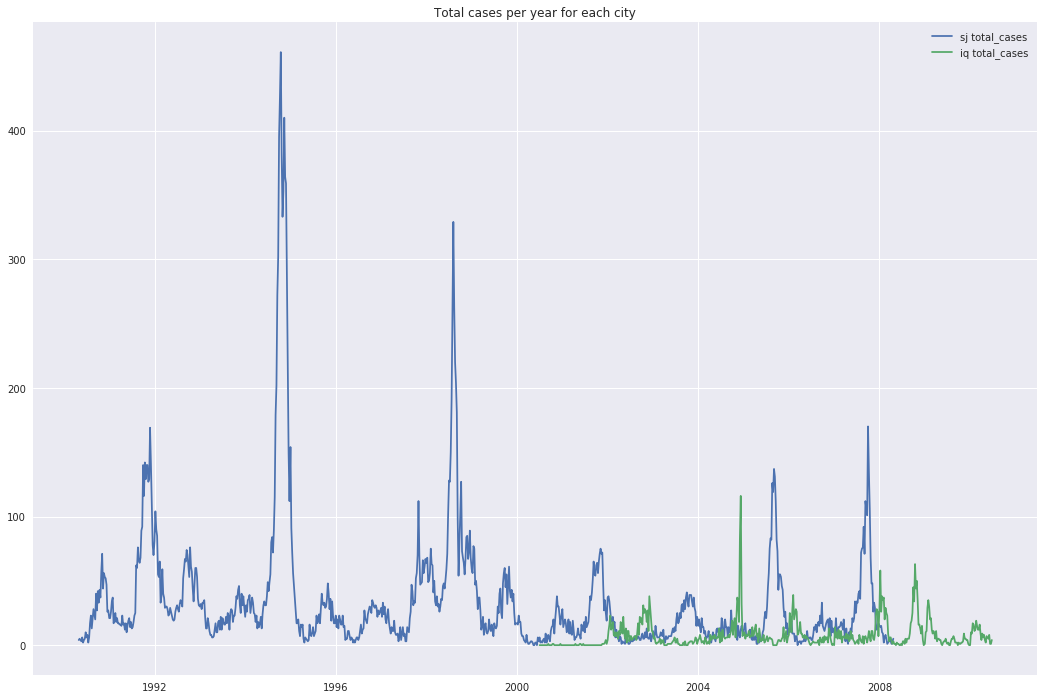

In [33]:
f = plt.figure(figsize=(18, 12))
plt.plot(train_df.loc['sj'].index.get_level_values('week_start_date'), train_df.loc['sj'].total_cases, label='sj total_cases')
plt.plot(train_df.loc['iq'].index.get_level_values('week_start_date'), train_df.loc['iq'].total_cases, label='iq total_cases')
plt.title('Total cases per year for each city')
plt.legend()
plt.savefig('./report/assets/target_visualization')

Although they look roughly similar to each other, they do not appear directly correlated.

It seems we have a period with either almost no data or with no cases for iq between 2000 and 2002

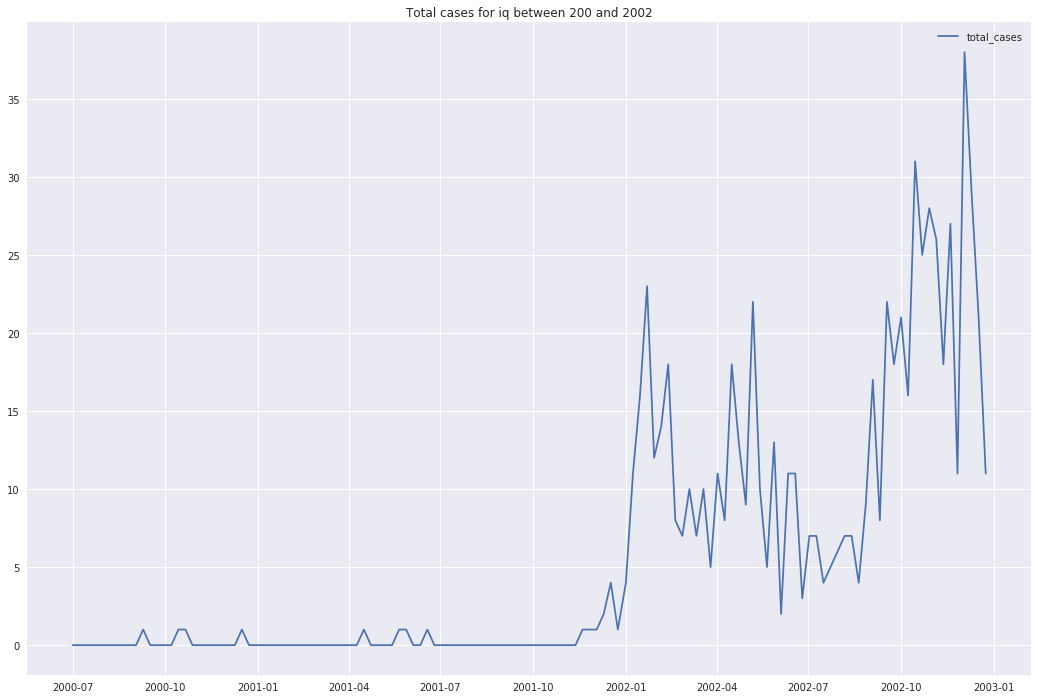

In [34]:
f = plt.figure(figsize=(18, 12))
plt.plot(train_df.loc[('iq', slice('2000', '2002')), :].index.get_level_values('week_start_date'), train_df.loc[('iq', slice('2000', '2002')), 'total_cases'])
plt.title('Total cases for iq between 200 and 2002')
plt.legend()

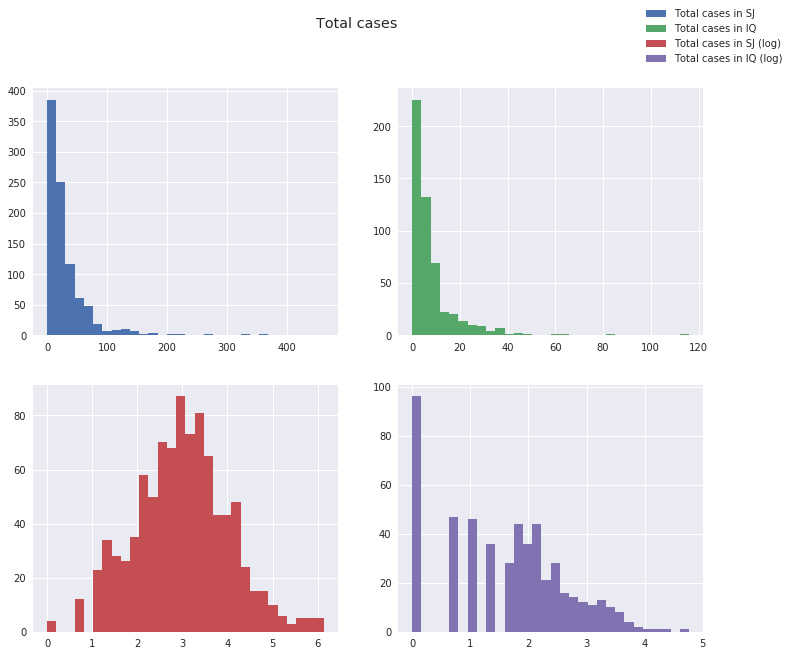

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))

ax1.hist(train_df.loc['sj'].total_cases, label='Total cases in SJ', color='C0', bins=30)
ax2.hist(train_df.loc['iq'].total_cases, label='Total cases in IQ', color='C1', bins=30)
ax3.hist(train_df.loc['sj'].total_cases.transform(lambda x: np.log(1+x)), label='Total cases in SJ (log)', color='C2', bins=30)
ax4.hist(train_df.loc['iq'].total_cases.transform(lambda x: np.log(1+x)), label='Total cases in IQ (log)', color='C3', bins=30)
fig.suptitle('Total cases')
fig.legend()
plt.savefig('./report/assets/target_hist.png')
plt.show()

The target variable is left skewed and positive.

Taking the log of it allows for a more *normal* distribution

## Features vizualization

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 8640x8640 with 0 Axes>

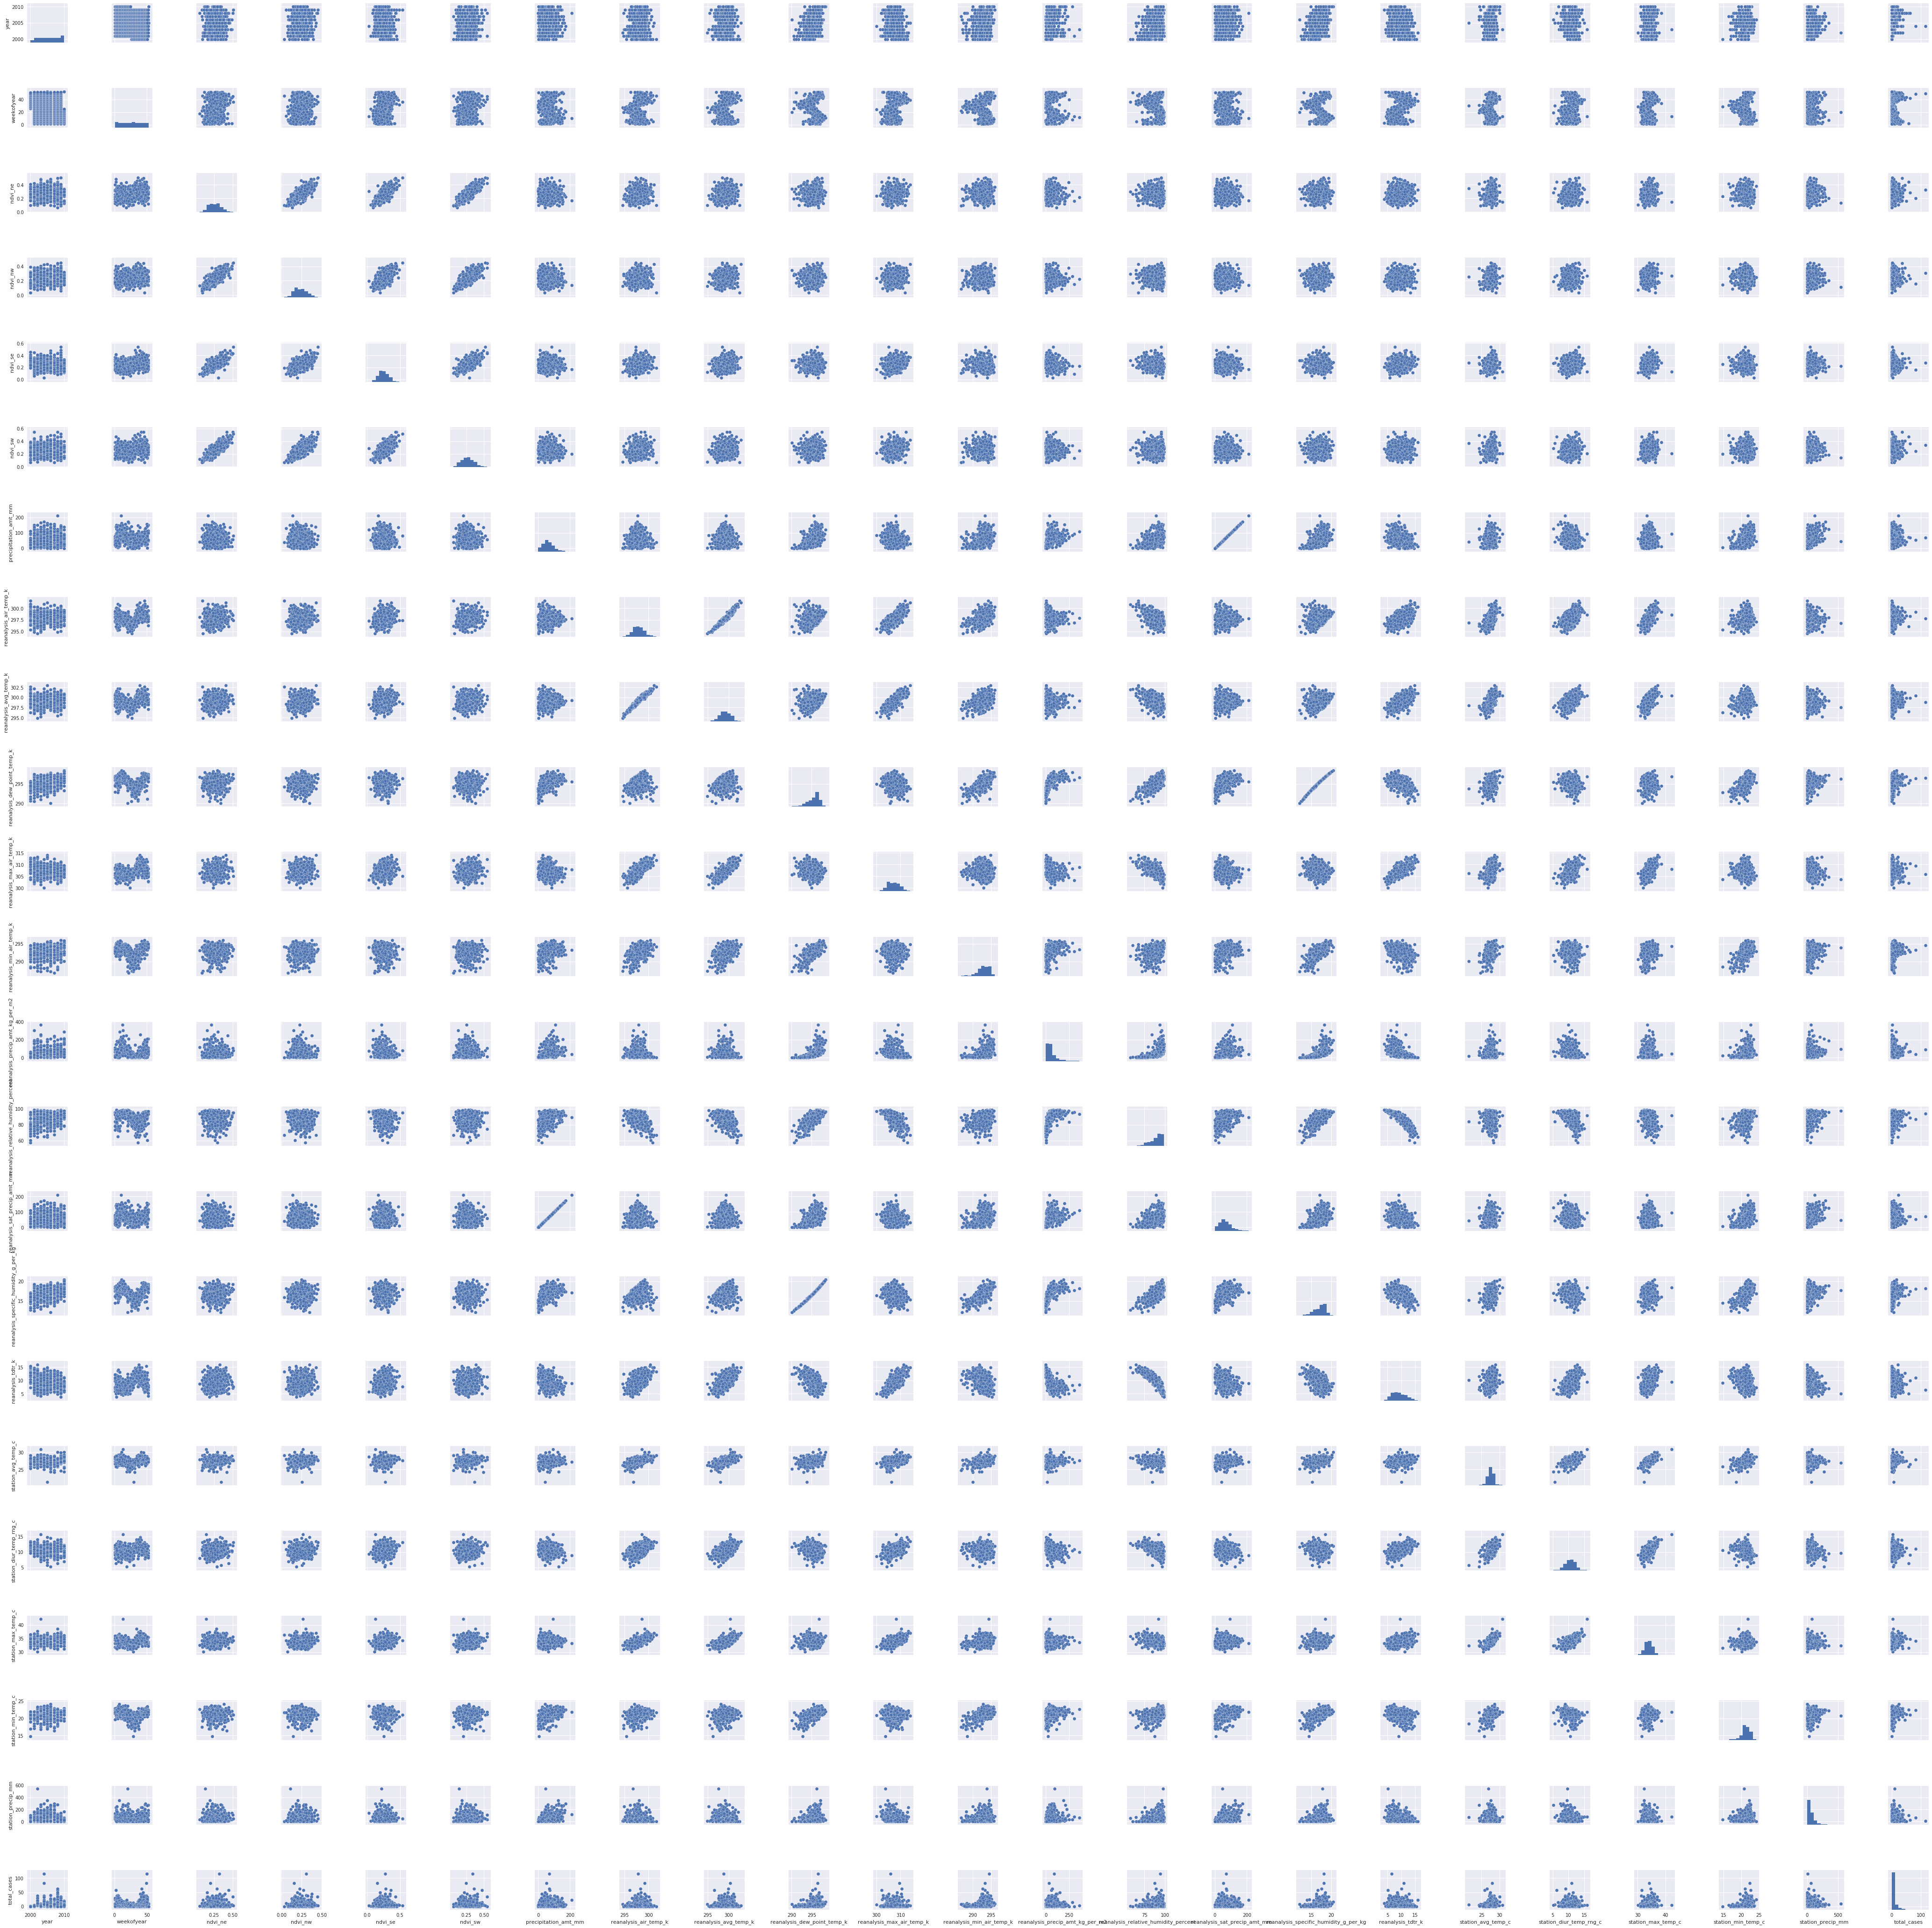

In [45]:
f = plt.figure(figsize=(120, 120))

pairplot_fig = sns.pairplot(train_df.loc['iq'])
sns_plot.savefig('pairplot_fig.png')
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


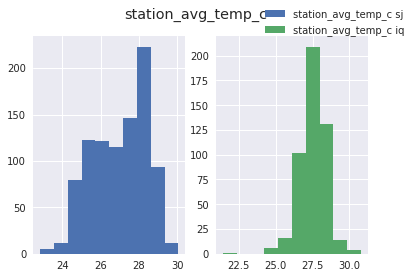

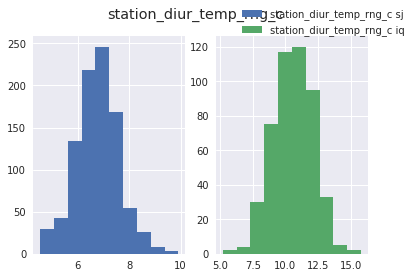

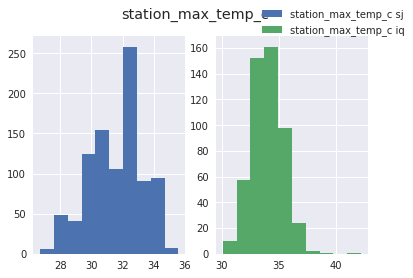

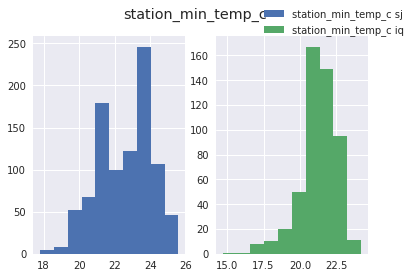

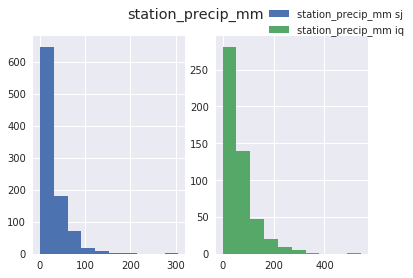

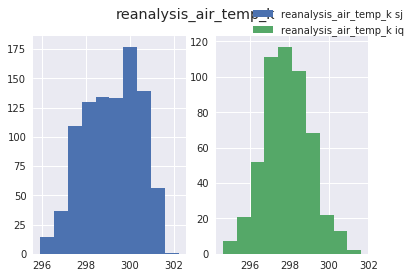

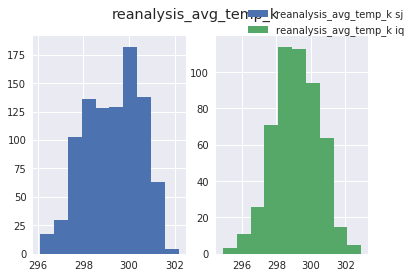

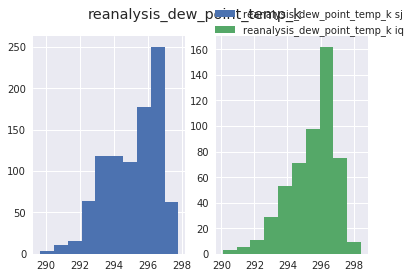

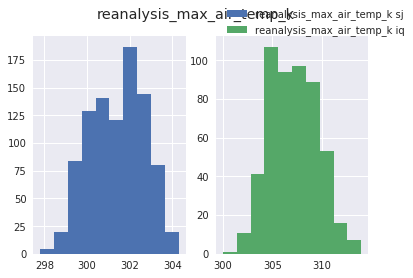

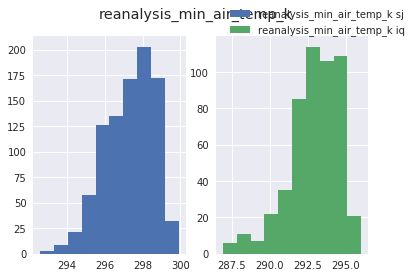

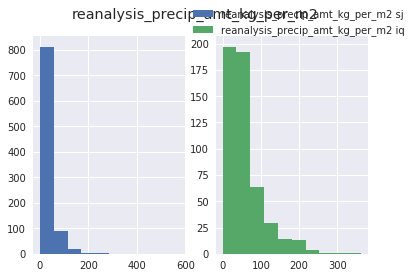

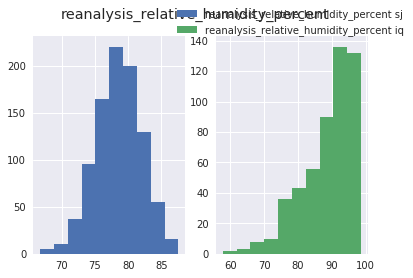

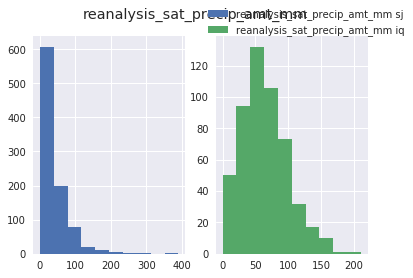

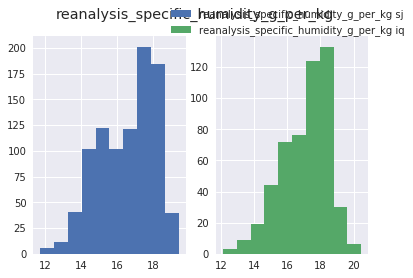

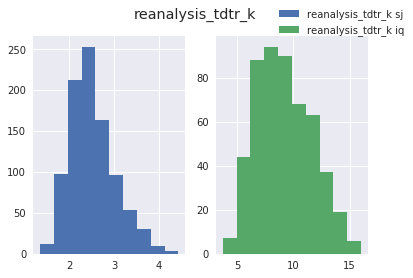

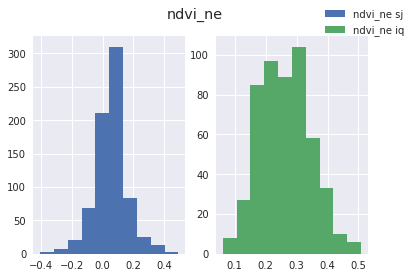

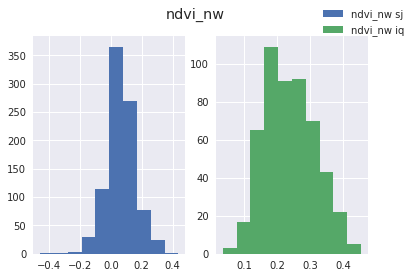

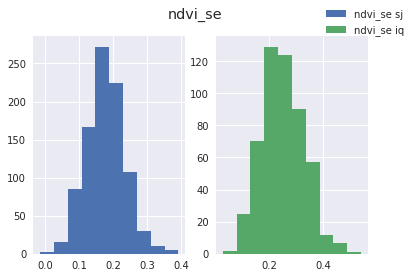

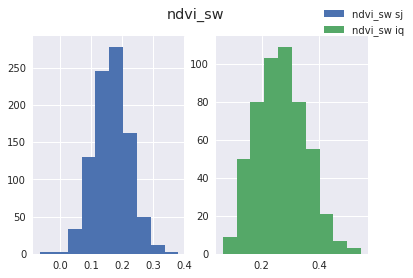

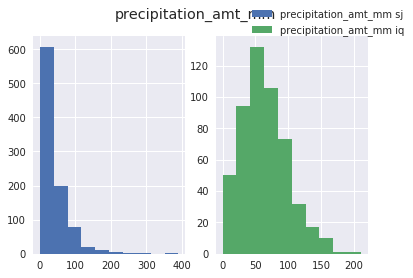

In [43]:
f = plt.figure(figsize=(18, 12))
for group, cols in cols_dict.items():
    for col in cols:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        for ix, ax in enumerate([ax1, ax2]):
            fig.suptitle(col)
            ax.hist(train_df.loc[cities[ix], col], label=f'{col} {cities[ix]}', color=f'C{ix}')
        fig.legend()

Features set seem coherent between the two cities.

Distributions are quite normal for most features.

Exceptions: 

- `relative_humidty_percent` for iq which is rightly skewed
- mix and min air temperature features tends to be bimodal

## Correlations

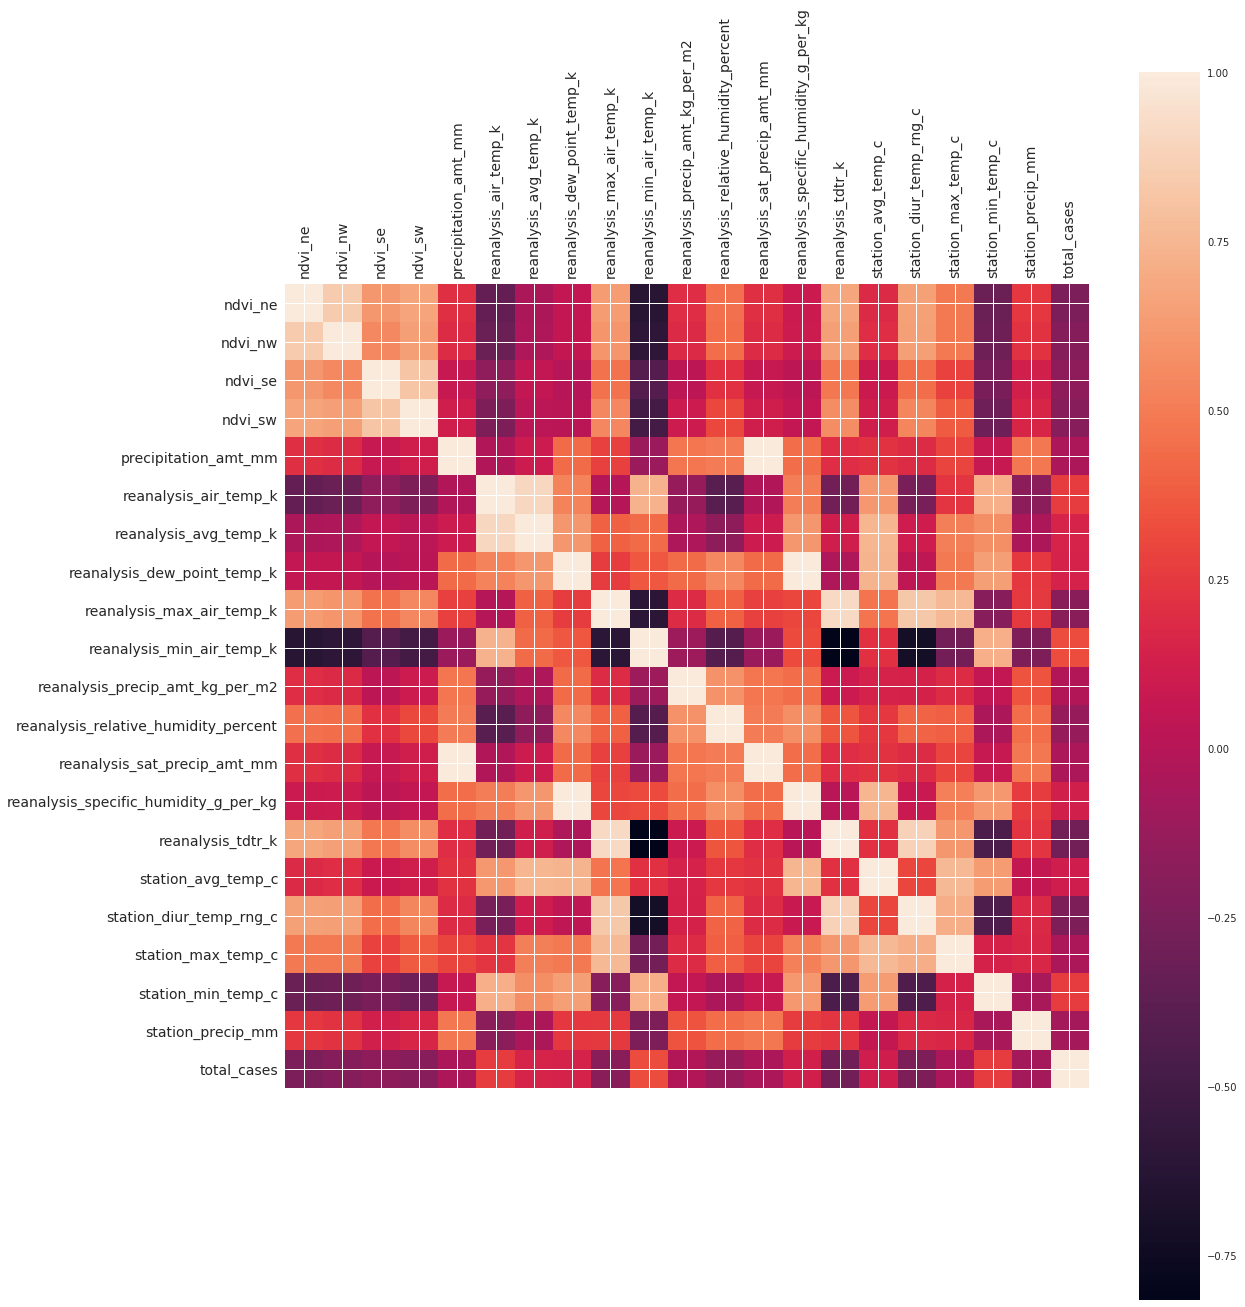

In [20]:
f = plt.figure(figsize=(18, 22))
sns.set()
train_df_corr = train_df.drop(columns=['city', 'year', 'weekofyear', 'week_start_date']).corr()
plt.matshow(train_df_corr, fignum=f.number)
plt.xticks(range(train_df_corr.shape[1]), train_df_corr.columns, fontsize=14, rotation=90)
plt.yticks(range(train_df_corr.shape[1]), train_df_corr.columns, fontsize=14)
cb = plt.colorbar()
plt.savefig('./report/assets/corr_heatmap.png')

**No directly obvious correlation between total_cases and other features**

However several are heavily correlated (to be expected since most temperature and humidity features are very similar)

In [137]:
mask = np.ones(train_df_corr.shape,dtype='bool')
mask[np.triu_indices(len(train_df_corr))] = False

top_corr = train_df_corr.mask(mask).apply(lambda x: x.sort_values(ascending=False).head(3)).unstack().dropna().abs().reset_index().drop_duplicates()
top_corr = top_corr[(top_corr.level_0 != top_corr.level_1) & (top_corr[0]>0.5)].sort_values(by=0, ascending=False)
top_corr.iloc[:, 0:3]

level_0  \
33           reanalysis_sat_precip_amt_mm   
37  reanalysis_specific_humidity_g_per_kg   
40                      reanalysis_tdtr_k   
16                  reanalysis_avg_temp_k   
46                station_diur_temp_rng_c   
1                                 ndvi_nw   
45                station_diur_temp_rng_c   
7                                 ndvi_sw   
49                     station_max_temp_c   
48                     station_max_temp_c   
42                     station_avg_temp_c   
43                     station_avg_temp_c   
24              reanalysis_min_air_temp_k   
52                     station_min_temp_c   
51                     station_min_temp_c   
39                      reanalysis_tdtr_k   
6                                 ndvi_sw   
21              reanalysis_max_air_temp_k   
3                                 ndvi_se   
19            reanalysis_dew_point_temp_k   
36  reanalysis_specific_humidity_g_per_kg   
22              reanalysis_max_air_temp_k   
31   reanalysis_relative_humidity_percent   
4                                 ndvi_se   
30   reanalysis_relative_humidity_percent   
18            reanalysis_dew_point_temp_k   

                                  level_1         0  
33                   precipitation_amt_mm  1.000000  
37            reanalysis_dew_point_temp_k  0.997051  
40              reanalysis_max_air_temp_k  0.918578  
16                  reanalysis_air_temp_k  0.901777  
46                      reanalysis_tdtr_k  0.881176  
1                                 ndvi_ne  0.850902  
45              reanalysis_max_air_temp_k  0.834263  
7                                 ndvi_se  0.820924  
49                     station_avg_temp_c  0.764576  
48              reanalysis_max_air_temp_k  0.763446  
42                  reanalysis_avg_temp_k  0.751330  
43  reanalysis_specific_humidity_g_per_kg  0.747809  
24                  reanalysis_air_temp_k  0.736765  
52              reanalysis_min_air_temp_k  0.720701  
51                  reanalysis_air_temp_k  0.719612  
39                                ndvi_ne  0.673935  
6                                 ndvi_ne  0.669504  
21                                ndvi_ne  0.634330  
3                                 ndvi_ne  0.614380  
19                  reanalysis_avg_temp_k  0.614268  
36                  reanalysis_avg_temp_k  0.612484  
22                                ndvi_nw  0.606775  
31        reanalysis_precip_amt_kg_per_m2  0.593928  
4                                 ndvi_nw  0.555809  
30            reanalysis_dew_point_temp_k  0.553766  
18                  reanalysis_air_temp_k  0.529771

### Check correlation differences between sj and iq

In [46]:
corr_city = pd.DataFrame({'iq_total':train_df.loc['iq'].corr().total_cases, 'sj_total': train_df.loc['sj'].corr().total_cases})

In [50]:
corr_city.iq_total.abs().sort_values(ascending=False).head(10)

|                                       |   iq_total |
|:--------------------------------------|-----------:|
| total_cases                           |   1        |
| reanalysis_specific_humidity_g_per_kg |   0.236476 |
| reanalysis_dew_point_temp_k           |   0.230401 |
| reanalysis_min_air_temp_k             |   0.214514 |
| station_min_temp_c                    |   0.211702 |
| year                                  |   0.179451 |
| reanalysis_tdtr_k                     |   0.134425 |
| reanalysis_relative_humidity_percent  |   0.130083 |
| station_avg_temp_c                    |   0.11307  |
| reanalysis_precip_amt_kg_per_m2       |   0.101171 |


In [51]:
corr_city.sj_total.abs().sort_values(ascending=False).head(10).to_markdown())

|                                       |   sj_total |
|:--------------------------------------|-----------:|
| total_cases                           |   1        |
| weekofyear                            |   0.287134 |
| year                                  |   0.21269  |
| reanalysis_specific_humidity_g_per_kg |   0.207947 |
| reanalysis_dew_point_temp_k           |   0.203774 |
| station_avg_temp_c                    |   0.196617 |
| reanalysis_max_air_temp_k             |   0.194532 |
| station_max_temp_c                    |   0.189901 |
| reanalysis_min_air_temp_k             |   0.187943 |
| reanalysis_air_temp_k                 |   0.181917 |


SJ seems to be much more correlated to the time of the year than IQ.

We see that a few features (`reanalysis_specific_humidity_g_per_kg` and `reanalysis_dew_point_temp_k` for instance) are correlated in both cases.

### Intra group of features correlations

In [175]:
train_df[ndvi_cols].corr().abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [176]:
train_df[station_cols].corr().abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [177]:
train_df[forecast_cols].corr().abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

### Inter group of features correlations

In [178]:
train_df[station_cols].apply(lambda x: train_df[forecast_cols].corrwith(x)).abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

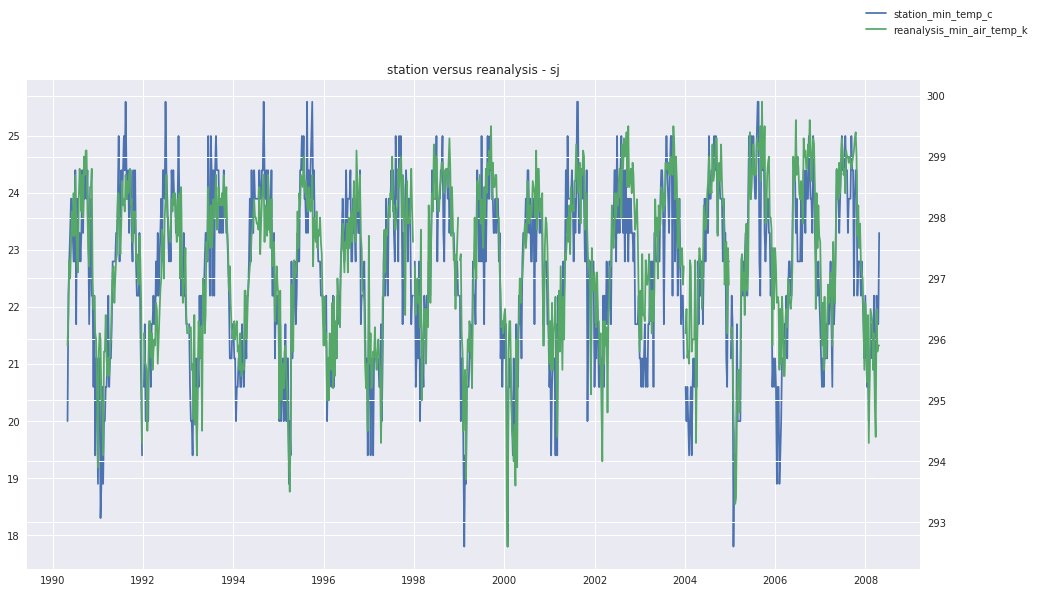

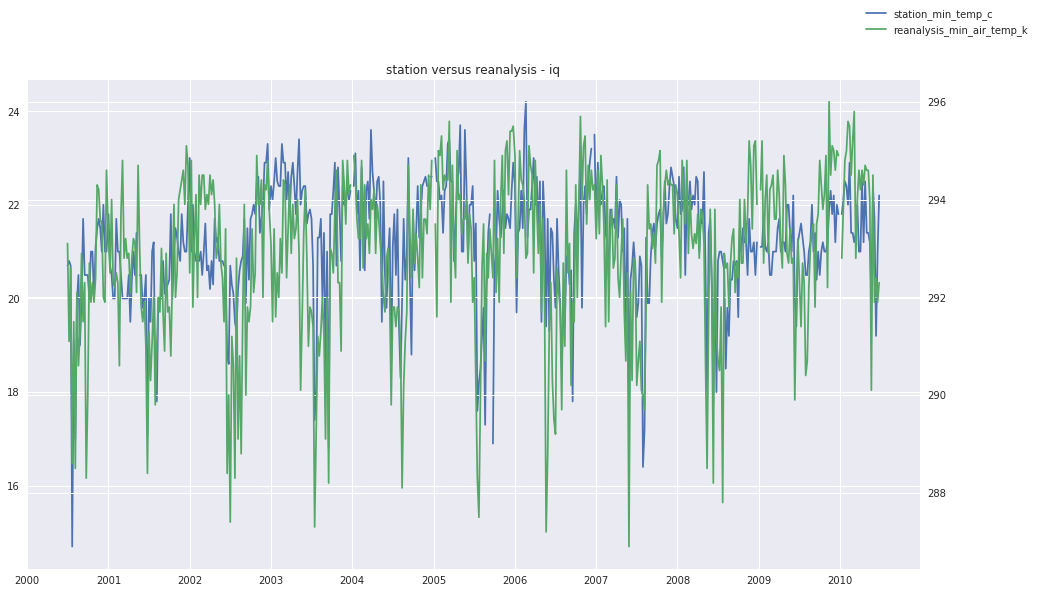

In [69]:
for city in cities:
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(train_df.loc[city].index.get_level_values('week_start_date'), train_df.loc[city].station_min_temp_c, color='C0')
    ax.twinx().plot(train_df.loc[city].index.get_level_values('week_start_date'), train_df.loc[city].reanalysis_min_air_temp_k, color='C1')
    fig.legend()
    plt.title(f'station versus reanalysis - {city}')


In [179]:
train_df[ndvi_cols].apply(lambda x: train_df[station_cols].corrwith(x)).abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [180]:
train_df[ndvi_cols].apply(lambda x: train_df[forecast_cols].corrwith(x)).abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

## A few features of interest

Additional plots for a few features that seems promising

In [226]:
columns = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']

features = ['reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_specific_humidity_g_per_kg']

We can plot these features along the target for both cities between 2002 and 2008 since we have data for both

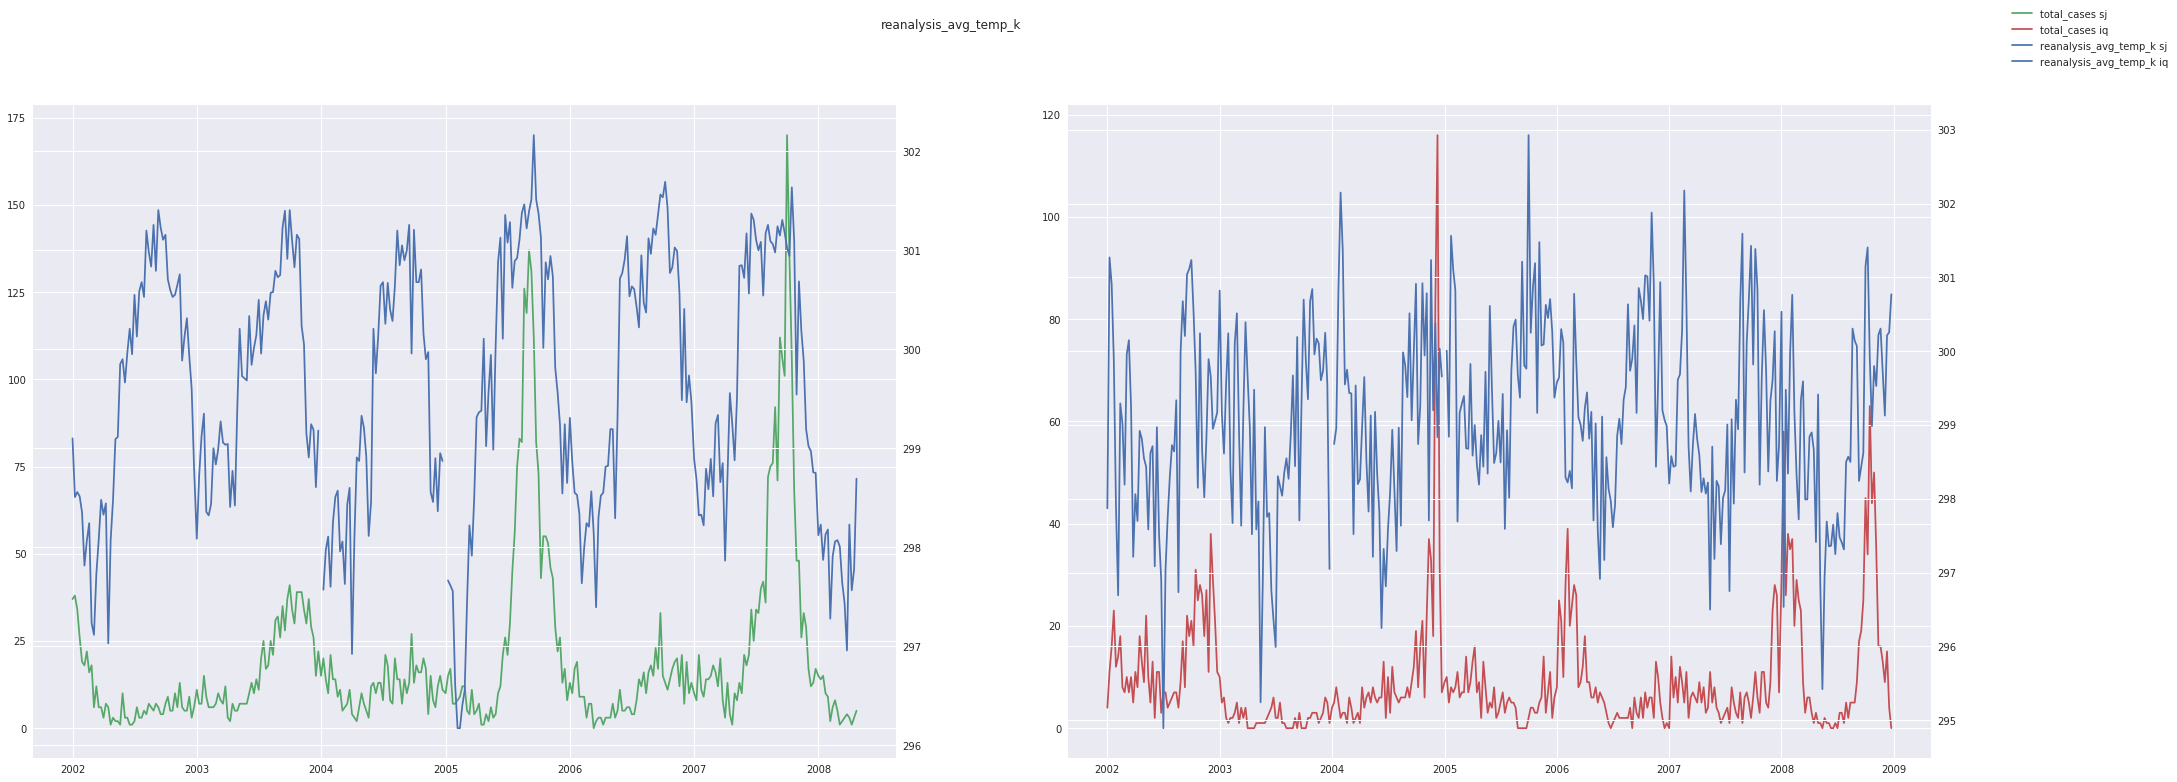

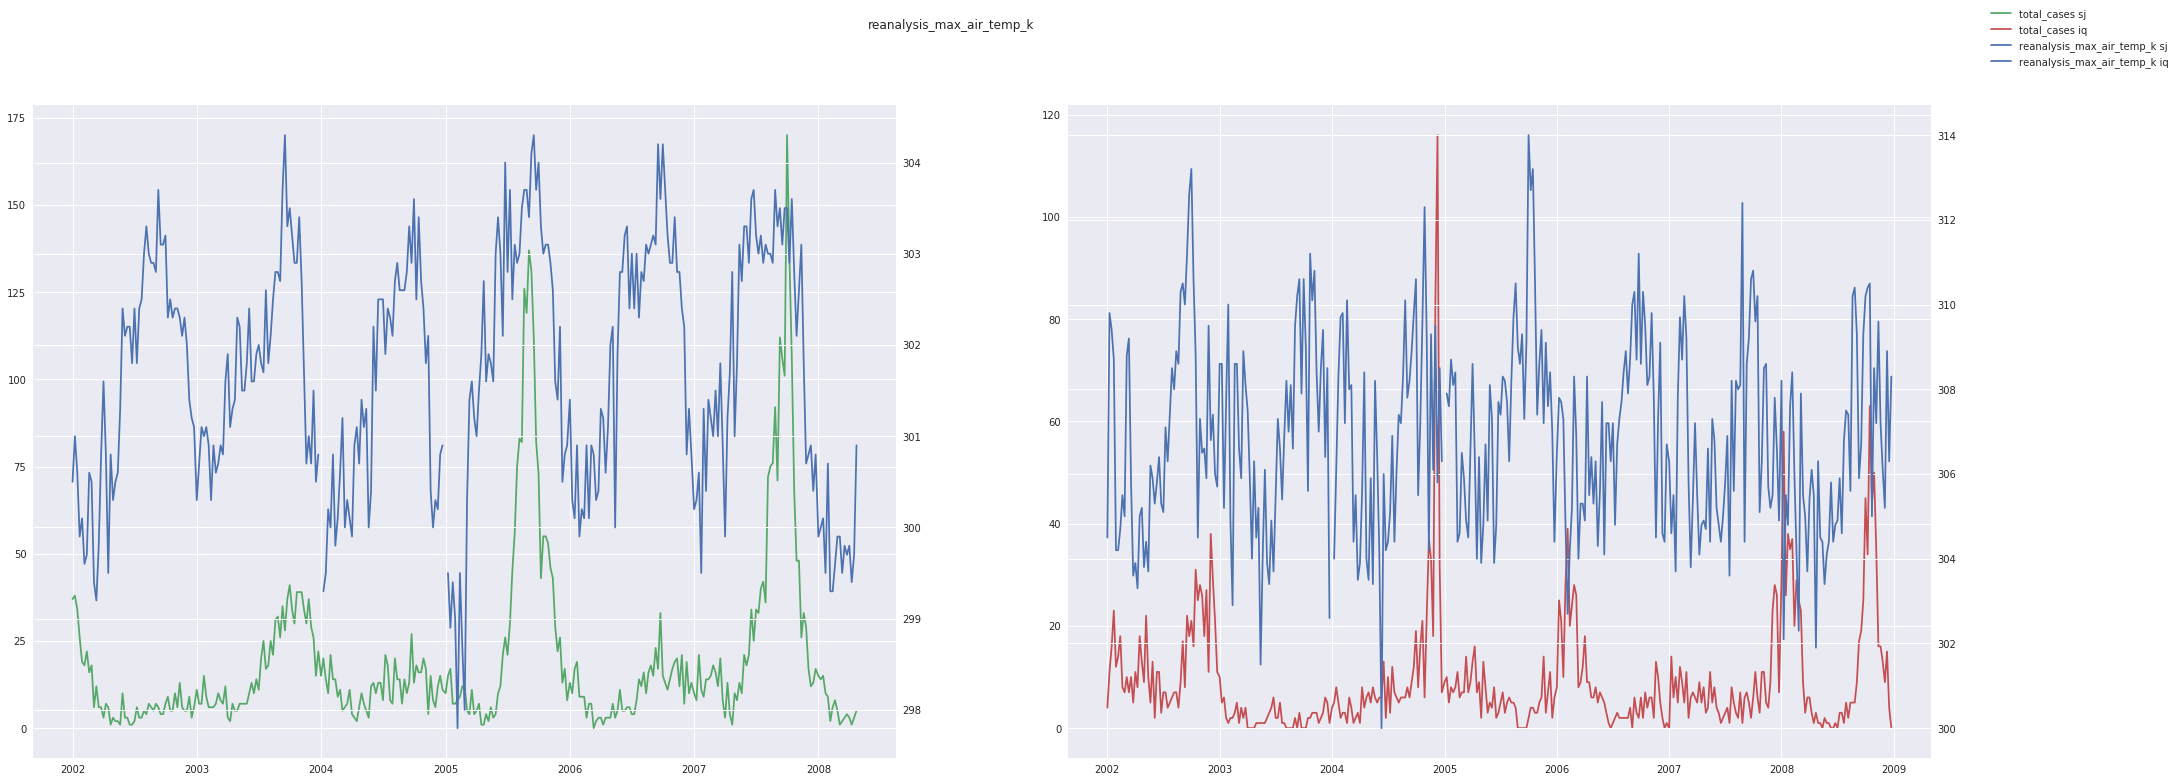

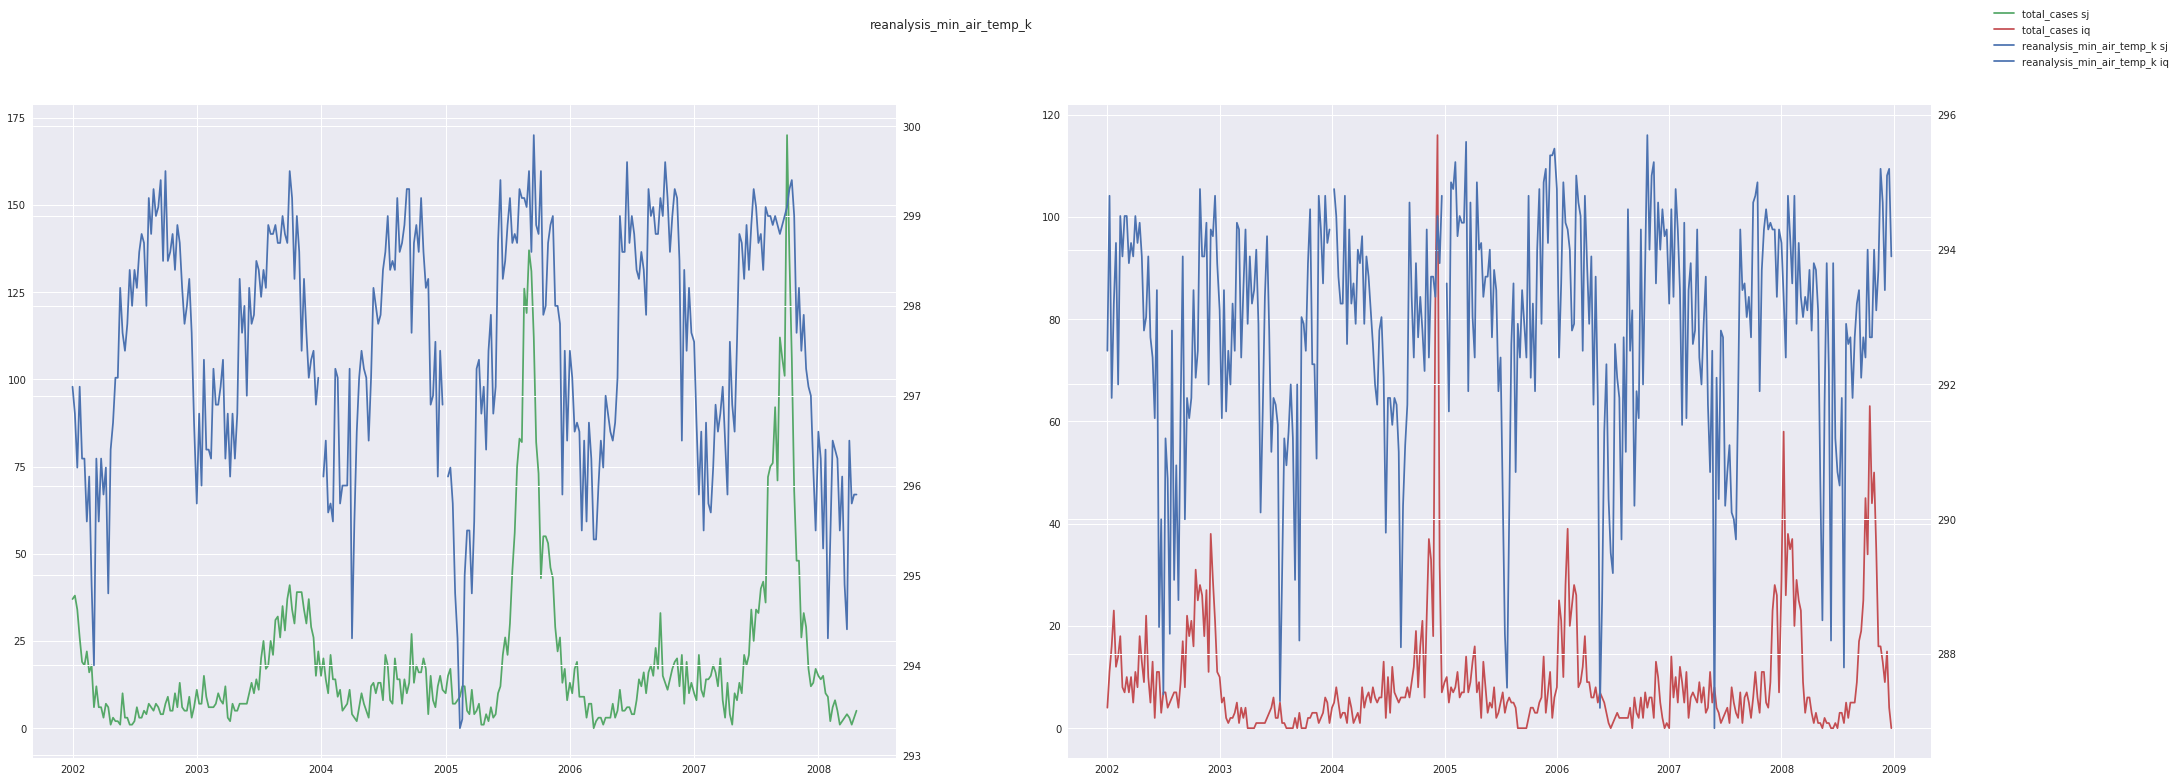

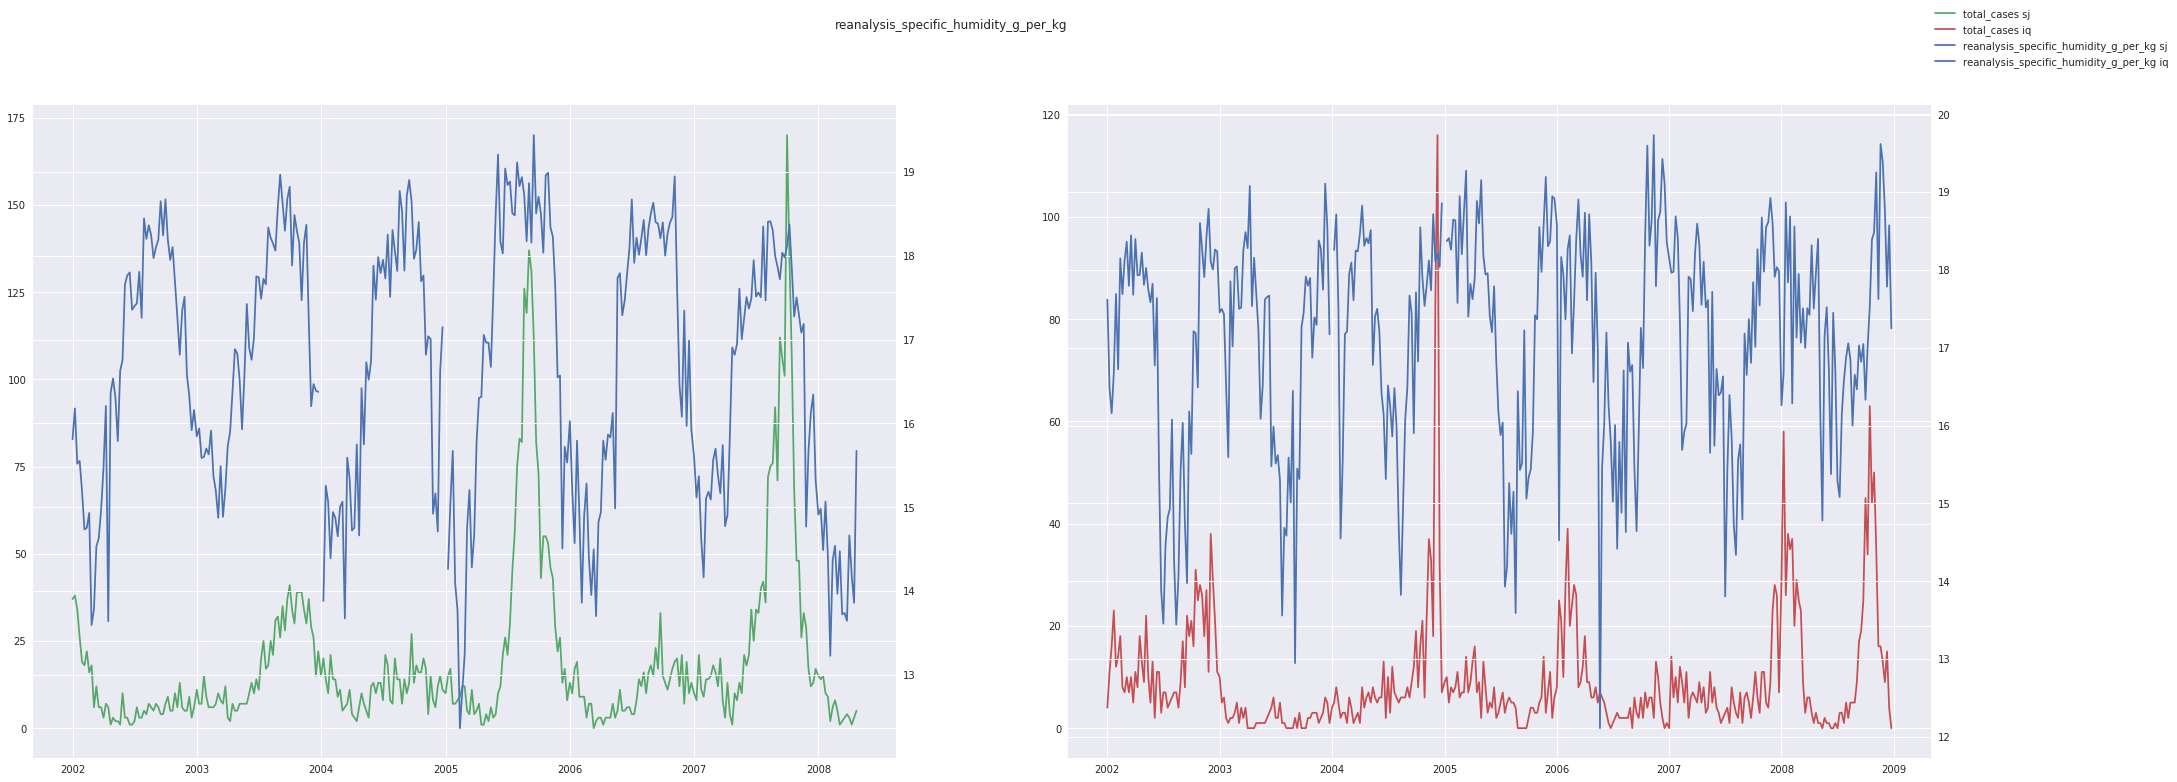

In [324]:
for col in features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(34, 12))
    for ix, ax in enumerate([ax1, ax2]):
        fig.suptitle(col)
        ax.plot(train_df.loc[(cities[ix], slice('2002', '2008')), :].index.get_level_values('week_start_date'), train_df.loc[(cities[ix], slice('2002', '2008')), 'total_cases'], label=f'total_cases {cities[ix]}', color=f'C{ix+1}')
        ax.twinx().plot(train_df.loc[(cities[ix], slice('2002', '2008')), :].index.get_level_values('week_start_date'), train_df.loc[(cities[ix], slice('2002', '2008')), col], label=f'{col} {cities[ix]}')
    fig.legend()
        

Closer look at distributions

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


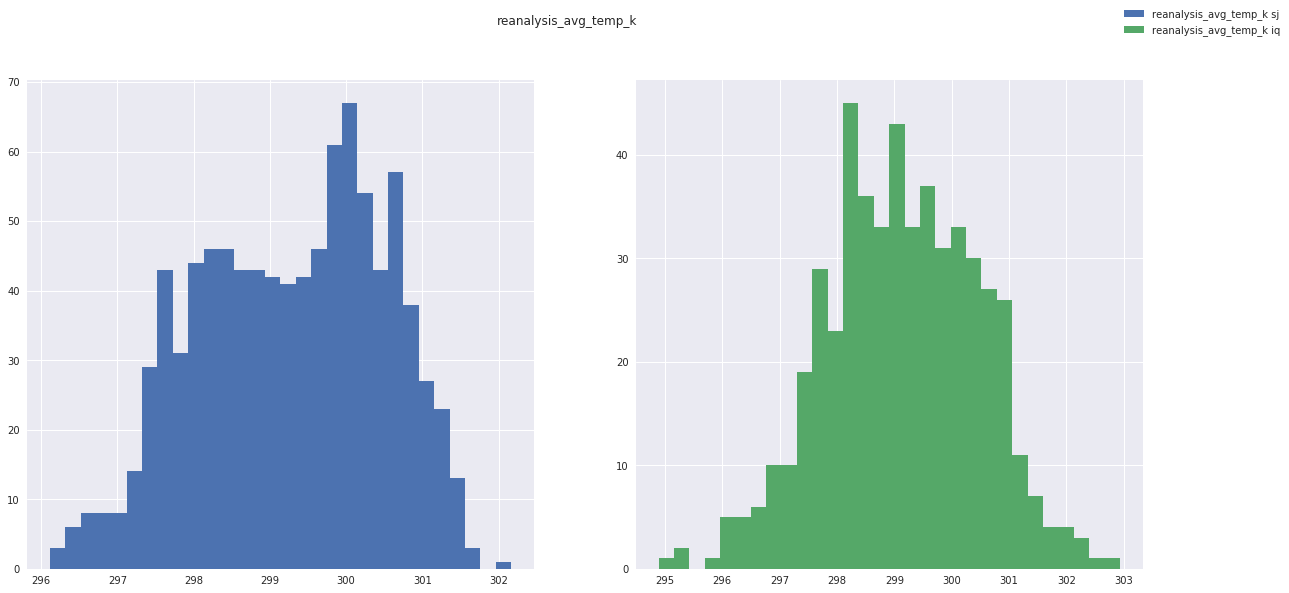

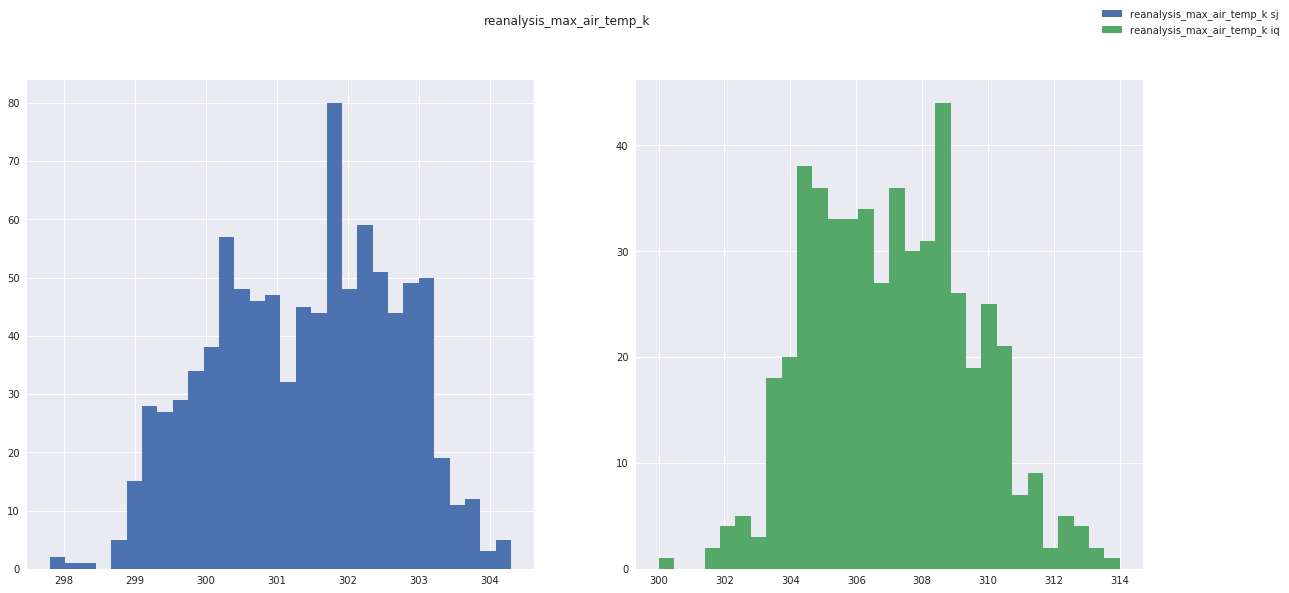

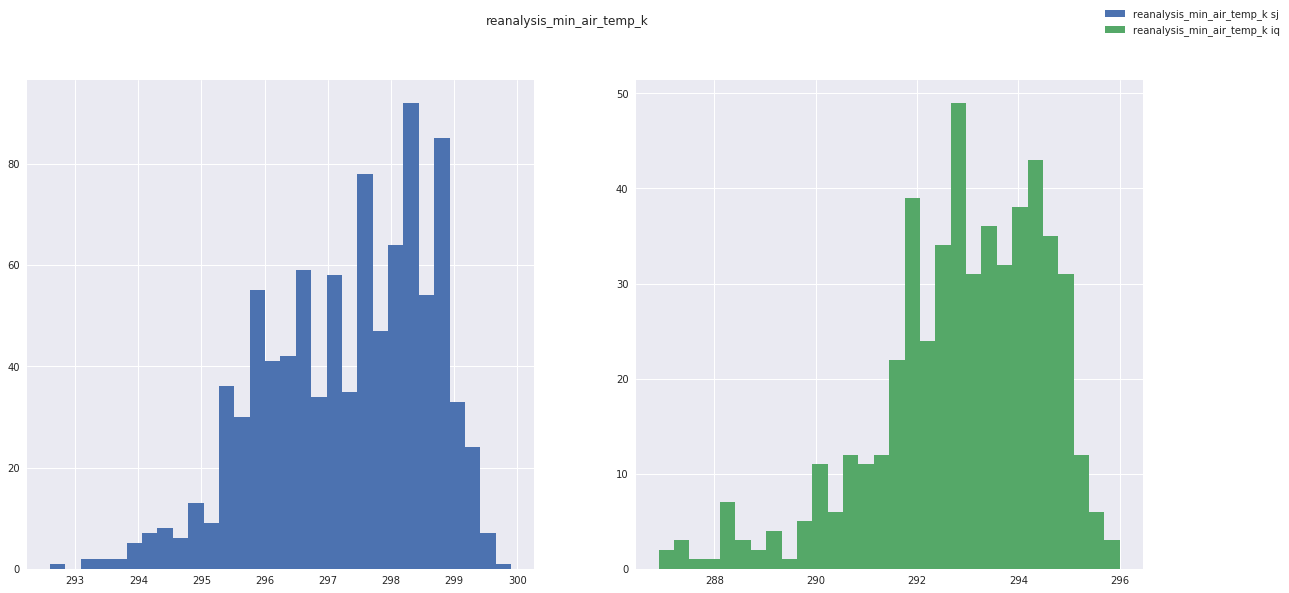

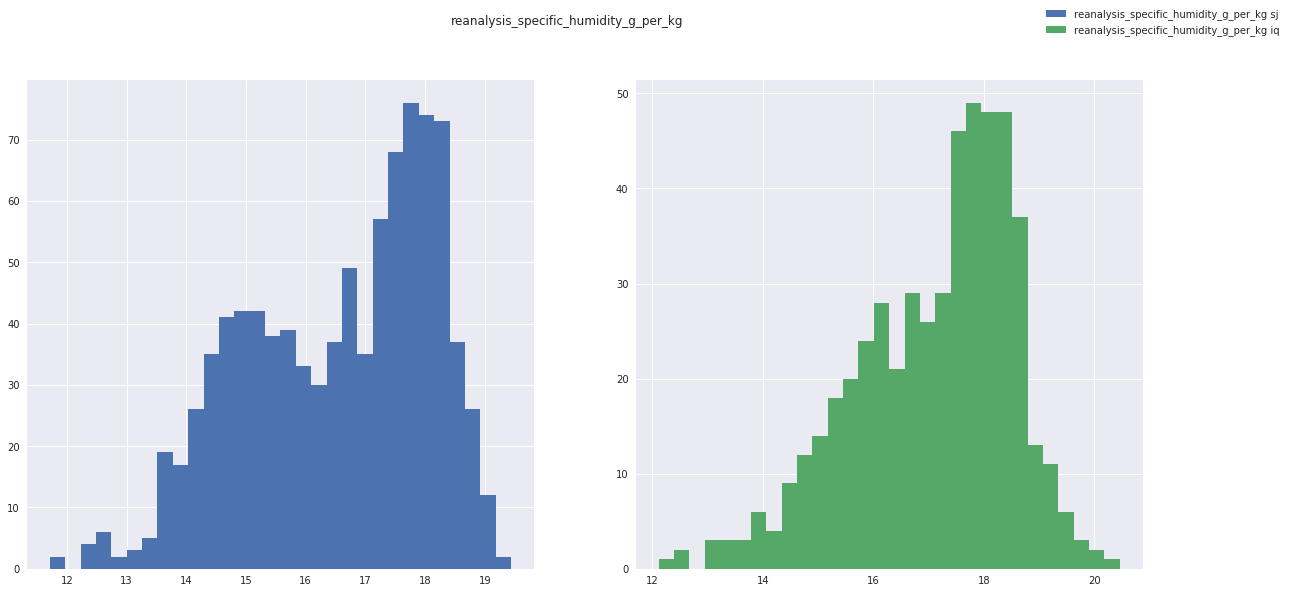

In [327]:
for col in features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
    for ix, ax in enumerate([ax1, ax2]):
        fig.suptitle(col)
        ax.hist(train_df.loc[cities[ix], col], label=f'{col} {cities[ix]}', color=f'C{ix}', bins=30)
    fig.legend()